<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [2]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 106.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB ? eta 0:00:00 0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 519.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 7.9 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 37.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB ? eta 0:00:00 0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import itertools


url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
data = pd.read_csv(url)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")
print(f"First few rows:")
print(data.head())

X = data.drop('win', axis = 1)
y = data['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Only transform test data

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


Dataset loaded successfully!
Dataset shape: (1000, 9)
Dataset columns: ['win', 'kills', 'deaths', 'assists', 'gold_earned', 'cs', 'wards_placed', 'wards_killed', 'damage_dealt']
First few rows:
   win  kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0    0     16       6       19        17088  231            11             7   
1    1      8       8        5        14865  259            10             2   
2    0      0      17       11        15919  169            14             5   
3    0     19      11        1        11534  264            14             3   
4    0     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [5]:
## Write your code here
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Define linear layer: input_dim features -> 1 output
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

# Initialize model parameters
input_dim = X_train_tensor.shape[1]  # Number of features
print(f"Input dimensions: {input_dim}")

model = LogisticRegressionModel(input_dim)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)



Input dimensions: 8


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [9]:
# Write your code here
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


print("Training completed!")

# Model evaluation after training
print("\nEvaluating model performance...")
model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient computation for evaluation
    # Get predictions for training set
    train_predictions = model(X_train_tensor)
    train_predicted_labels = (train_predictions > 0.5).float()
    
    # Get predictions for test set
    test_predictions = model(X_test_tensor)
    test_predicted_labels = (test_predictions > 0.5).float()
    
    # Calculate accuracies
    train_accuracy = (train_predicted_labels.eq(y_train_tensor).sum() / len(y_train_tensor)).item()
    test_accuracy = (test_predicted_labels.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
    
    print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Epoch [100/1000], Loss: 0.6853
Epoch [200/1000], Loss: 0.6853
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6852
Epoch [600/1000], Loss: 0.6852
Epoch [700/1000], Loss: 0.6852
Epoch [800/1000], Loss: 0.6852
Epoch [900/1000], Loss: 0.6852
Epoch [1000/1000], Loss: 0.6852
Training completed!

Evaluating model performance...
Training Accuracy: 0.5437 (54.37%)
Test Accuracy: 0.5050 (50.50%)


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [11]:
## Write your code here
# Reinitialize model for fair comparison
model_l2 = LogisticRegressionModel(input_dim)
criterion_l2 = nn.BCELoss()
# Add weight decay for L2 regularization
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)

# Training with L2 regularization
num_epochs = 1000
for epoch in range(num_epochs):
    model_l2.train()
    optimizer_l2.zero_grad()
    
    outputs = model_l2(X_train_tensor)
    loss = criterion_l2(outputs, y_train_tensor)
    
    loss.backward()
    optimizer_l2.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate L2 regularized model
model_l2.eval()
with torch.no_grad():
    train_pred_l2 = model_l2(X_train_tensor)
    test_pred_l2 = model_l2(X_test_tensor)
    
    train_labels_l2 = (train_pred_l2 > 0.5).float()
    test_labels_l2 = (test_pred_l2 > 0.5).float()
    
    train_acc_l2 = (train_labels_l2.eq(y_train_tensor).sum() / len(y_train_tensor)).item()
    test_acc_l2 = (test_labels_l2.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
    
    print(f"\nL2 Regularized Model Results:")
    print(f"Training Accuracy: {train_acc_l2:.4f} ({train_acc_l2*100:.2f}%)")
    print(f"Test Accuracy: {test_acc_l2:.4f} ({test_acc_l2*100:.2f}%)")

Epoch [100/1000], Loss: 0.7095
Epoch [200/1000], Loss: 0.7001
Epoch [300/1000], Loss: 0.6943
Epoch [400/1000], Loss: 0.6908
Epoch [500/1000], Loss: 0.6887
Epoch [600/1000], Loss: 0.6874
Epoch [700/1000], Loss: 0.6866
Epoch [800/1000], Loss: 0.6861
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856

L2 Regularized Model Results:
Training Accuracy: 0.5550 (55.50%)
Test Accuracy: 0.5100 (51.00%)


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.



Generating Confusion Matrix...


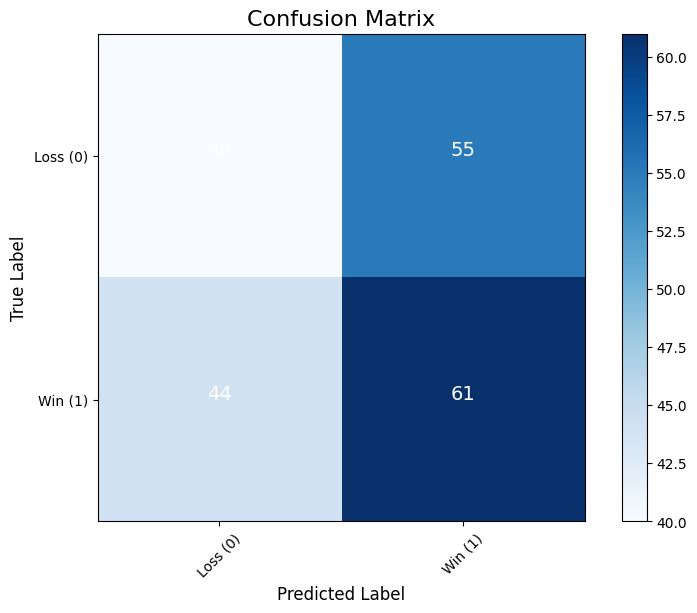


CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Loss       0.48      0.42      0.45        95
         Win       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200


Generating ROC Curve...


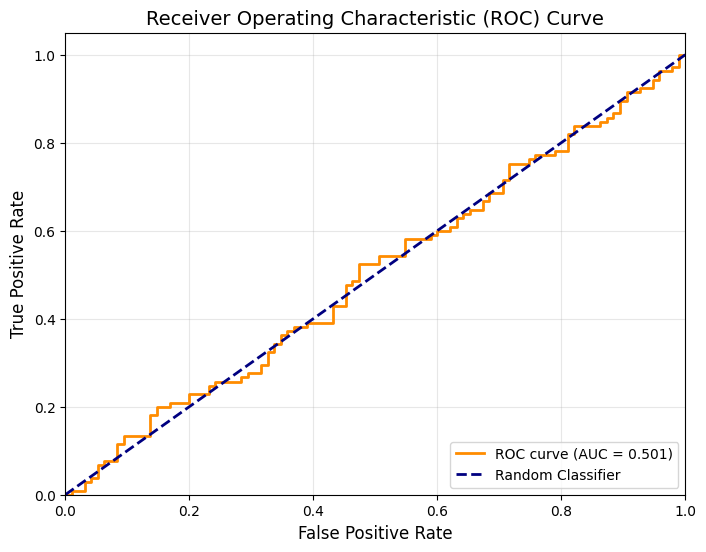

Area Under ROC Curve (AUC): 0.501


In [12]:
## Write your code here
# Use the L2 regularized model for visualizations
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test_labels = (y_pred_test > 0.5).float()

# Convert tensors to numpy for sklearn metrics
y_test_np = y_test_tensor.numpy().flatten()
y_pred_test_np = y_pred_test_labels.numpy().flatten()
y_pred_test_proba = y_pred_test.numpy().flatten()

# 1. Confusion Matrix
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test_np, y_pred_test_np)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=16)
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss (0)', 'Win (1)'], rotation=45)
plt.yticks(tick_marks, ['Loss (0)', 'Win (1)'])

# Add text annotations
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]}', 
             horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black",
             fontsize=14)

plt.tight_layout()
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# 2. Classification Report
print("\n" + "="*40)
print("CLASSIFICATION REPORT")
print("="*40)
report = classification_report(y_test_np, y_pred_test_np, 
                             target_names=['Loss', 'Win'])
print(report)

# 3. ROC Curve
print("\nGenerating ROC Curve...")
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Area Under ROC Curve (AUC): {roc_auc:.3f}")



Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [13]:
model_filename = 'lol_match_predictor_model.pth'

# Save the model
print(f"Saving model to {model_filename}...")
torch.save(model.state_dict(), model_filename)
print("Model saved successfully!")

# Load the model
print("Loading saved model...")
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load(model_filename))
loaded_model.eval()
print("Model loaded successfully!")

# Evaluate the loaded model to ensure consistency
print("Evaluating loaded model...")
with torch.no_grad():
    loaded_predictions = loaded_model(X_test_tensor)
    loaded_predicted_labels = (loaded_predictions > 0.5).float()
    loaded_accuracy = (loaded_predicted_labels.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
    
    print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f} ({loaded_accuracy*100:.2f}%)")
    print("Model loading verification: ✓ PASSED" if abs(loaded_accuracy - test_accuracy) < 1e-6 
          else "Model loading verification: ✗ FAILED")




Saving model to lol_match_predictor_model.pth...
Model saved successfully!
Loading saved model...
Model loaded successfully!
Evaluating loaded model...
Loaded Model Test Accuracy: 0.5050 (50.50%)
Model loading verification: ✓ PASSED


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [14]:
learning_rates = [0.01, 0.05, 0.1]
best_lr = None
best_accuracy = 0.0
results = []

print("Testing different learning rates...")
print("-" * 40)

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    
    # Reinitialize model and optimizer for each learning rate
    tune_model = LogisticRegressionModel(input_dim)
    tune_optimizer = optim.SGD(tune_model.parameters(), lr=lr)
    tune_criterion = nn.BCELoss()
    
    # Train for fewer epochs for hyperparameter tuning
    num_epochs_tune = 100
    
    for epoch in range(num_epochs_tune):
        tune_model.train()
        tune_optimizer.zero_grad()
        
        outputs = tune_model(X_train_tensor)
        loss = tune_criterion(outputs, y_train_tensor)
        
        loss.backward()
        tune_optimizer.step()
    
    # Evaluate the model
    tune_model.eval()
    with torch.no_grad():
        test_pred = tune_model(X_test_tensor)
        test_labels = (test_pred > 0.5).float()
        accuracy = (test_labels.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
    
    results.append((lr, accuracy))
    print(f"Learning Rate: {lr}, Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Track best learning rate
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr

print(f"\n" + "="*40)
print("HYPERPARAMETER TUNING RESULTS")
print("="*40)
print(f"Best Learning Rate: {best_lr}")
print(f"Best Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("\nAll Results:")
for lr, acc in results:
    marker = " ← BEST" if lr == best_lr else ""
    print(f"  LR: {lr:4.2f} → Accuracy: {acc:.4f}{marker}")


Testing different learning rates...
----------------------------------------

Testing learning rate: 0.01
Learning Rate: 0.01, Test Accuracy: 0.4900 (49.00%)

Testing learning rate: 0.05
Learning Rate: 0.05, Test Accuracy: 0.5200 (52.00%)

Testing learning rate: 0.1
Learning Rate: 0.1, Test Accuracy: 0.4950 (49.50%)

HYPERPARAMETER TUNING RESULTS
Best Learning Rate: 0.05
Best Test Accuracy: 0.5200 (52.00%)

All Results:
  LR: 0.01 → Accuracy: 0.4900
  LR: 0.05 → Accuracy: 0.5200 ← BEST
  LR: 0.10 → Accuracy: 0.4950


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


Analyzing feature importance...

Top 10 Most Important Features:
--------------------------------------------------
 1. gold_earned               |   0.1752 | ↑ Increases win probability
 2. kills                     |   0.1307 | ↑ Increases win probability
 3. wards_placed              |   0.1062 | ↑ Increases win probability
 4. wards_killed              |  -0.0344 | ↓ Decreases win probability
 5. damage_dealt              |  -0.0187 | ↓ Decreases win probability
 6. assists                   |  -0.0137 | ↓ Decreases win probability
 7. cs                        |  -0.0074 | ↓ Decreases win probability
 8. deaths                    |  -0.0048 | ↓ Decreases win probability


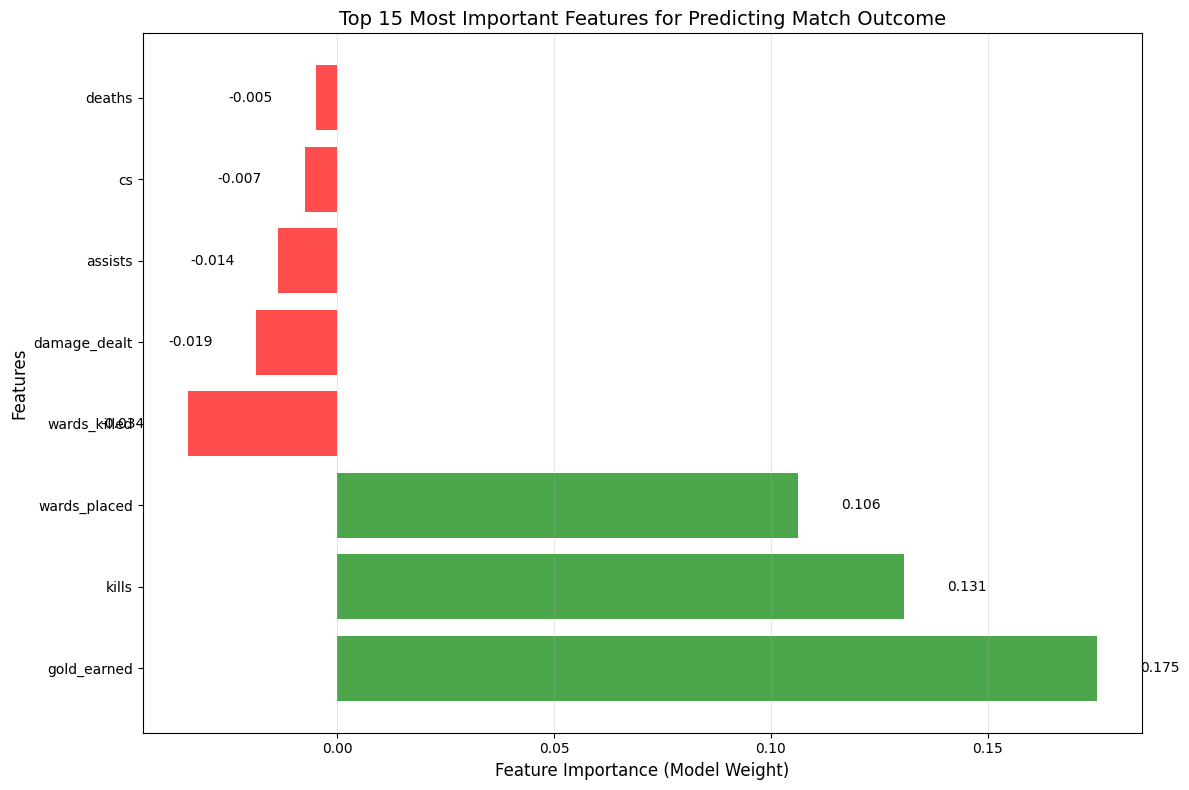


Feature Importance Statistics:
Number of features: 8
Most positive feature: gold_earned (0.1752)
Most negative feature: wards_killed (-0.0344)
Average absolute importance: 0.0614


In [15]:

# Task 8: Analyze feature importance
print("Analyzing feature importance...")

# Extract weights from the trained model
model.eval()
weights = model.linear.weight.data.numpy().flatten()
feature_names = X.columns.tolist()

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': weights
})

# Sort by absolute importance (most influential features first)
feature_importance['Abs_Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print("-" * 50)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    direction = "↑ Increases win probability" if row['Importance'] > 0 else "↓ Decreases win probability"
    print(f"{i+1:2d}. {row['Feature']:25s} | {row['Importance']:8.4f} | {direction}")

# Visualize feature importance
plt.figure(figsize=(12, 8))

# Plot top 15 features for better visibility
top_features = feature_importance.head(15)
colors = ['green' if imp > 0 else 'red' for imp in top_features['Importance']]

bars = plt.barh(range(len(top_features)), top_features['Importance'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance (Model Weight)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Most Important Features for Predicting Match Outcome', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_features['Importance'])):
    plt.text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

# Feature importance statistics
print(f"\nFeature Importance Statistics:")
print(f"Number of features: {len(feature_importance)}")
print(f"Most positive feature: {feature_importance.loc[feature_importance['Importance'].idxmax(), 'Feature']} "
      f"({feature_importance['Importance'].max():.4f})")
print(f"Most negative feature: {feature_importance.loc[feature_importance['Importance'].idxmin(), 'Feature']} "
      f"({feature_importance['Importance'].min():.4f})")
print(f"Average absolute importance: {feature_importance['Abs_Importance'].mean():.4f}")



Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
